In [2]:
from NLMNN import NLMNN
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate,GridSearchCV
import matplotlib.pyplot as plt
from metric_learn import LMNN
import numpy as np
from KNN_wrappers import LMNNClassifier, NLMNNClassifier, Chi2Classifier
%load_ext autoreload

%autoreload 2

In [3]:
%matplotlib notebook

Load wine dataset, and run reference models

In [4]:
wine = load_wine()
X = wine.data
X = X
n, d = X.shape
X = X/np.sum(X, axis=1, keepdims=True)
y = wine.target  

scores_c1 = cross_validate(KNeighborsClassifier(n_neighbors=3), X, y, cv=5, return_train_score=True, return_estimator=True )
scores_c2 = cross_validate(LMNNClassifier(k=3), X, y, cv=5, return_train_score=True, return_estimator=True )

steps=10
parameters = {'mu': np.logspace(-2,2, num=steps)}
model = LMNNClassifier(k=3)
clf_lmnn = GridSearchCV(model, parameters, cv=5, verbose=3, n_jobs=10)
clf_lmnn.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   13.3s
[Parallel(n_jobs=10)]: Done  48 out of  50 | elapsed:   24.5s remaining:    1.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:   24.7s finished
/zhome/9e/8/130993/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LMNNClassifier(k=3, mu=0.5, pca=None, train=True),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'mu': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

# Grid search




In [5]:
steps=10
parameters = {'mu': np.logspace(-2,2, num=steps),
              'l':np.logspace(-2,2, num=steps)}
model = NLMNNClassifier(k=3, use_softmax=False)
clf = GridSearchCV(model, parameters, cv=5, verbose=3, n_jobs=10)
clf.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   18.5s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 500 out of 500 | elapsed:  7.3min finished
/zhome/9e/8/130993/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=NLMNNClassifier(A_init=None, k=3, l=0.01, lr=1, max_lr_reductions=20, mu=1,
        r=None, use_softmax=False),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'mu': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02]), 'l': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

<IPython.core.display.Javascript object>


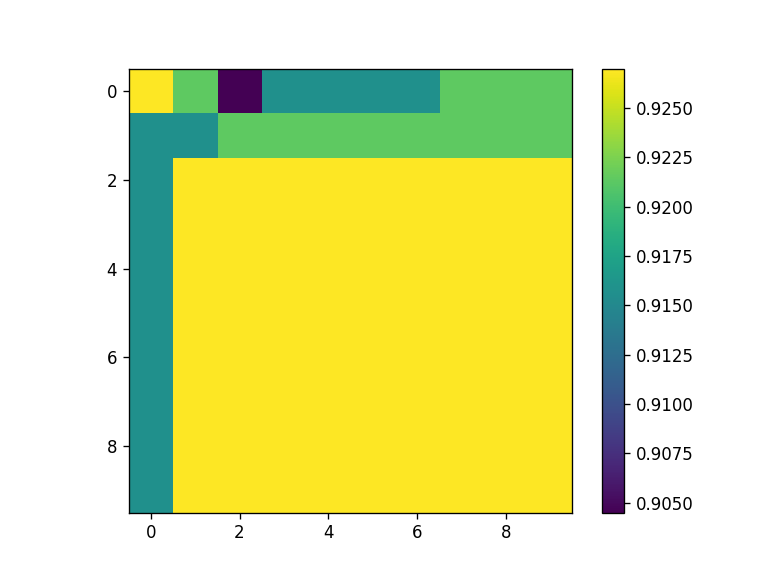

In [6]:
plt.figure()
plt.imshow(clf.cv_results_['mean_test_score'].reshape(steps, steps))
plt.colorbar()

In [8]:
print(f"normal           KNN train acc={np.mean(scores_c1['test_score']):.3f} +- {np.std(scores_c1['test_score'])/np.sqrt(5):.3f},  test acc={np.mean(scores_c1['test_score']):.3f} +- {np.std(scores_c1['test_score'])/np.sqrt(5):.3f}")
print(f"trained    LMNN  KNN train acc={clf_lmnn.cv_results_['mean_train_score'][clf_lmnn.best_index_]:.3f} +- {clf_lmnn.cv_results_['std_train_score'][clf_lmnn.best_index_]/np.sqrt(5):.3f},  test acc={clf_lmnn.cv_results_['mean_test_score'][clf_lmnn.best_index_]:.3f} +- {clf_lmnn.cv_results_['std_test_score'][clf_lmnn.best_index_]/np.sqrt(5):.3f}")
print(f"untrained NLMNN  KNN train acc={np.mean(scores_c2['train_score']):.3f} +- {np.std(scores_c2['train_score'])/np.sqrt(5):.3f},  test acc={np.mean(scores_c2['test_score']):.3f} +- {np.std(scores_c2['test_score'])/np.sqrt(5):.3f}")
print(f"trained   NLMNN  KNN train acc={clf.cv_results_['mean_train_score'][clf.best_index_]:.3f} +- {clf.cv_results_['std_train_score'][clf.best_index_]/np.sqrt(5):.3f},  test acc={clf.cv_results_['mean_test_score'][clf.best_index_]:.3f} +- {clf.cv_results_['std_test_score'][clf.best_index_]/np.sqrt(5):.3f}")


normal           KNN train acc=0.726 +- 0.032,  test acc=0.726 +- 0.032
trained    LMNN  KNN train acc=0.968 +- 0.003,  test acc=0.888 +- 0.029
untrained NLMNN  KNN train acc=0.962 +- 0.005,  test acc=0.873 +- 0.035
trained   NLMNN  KNN train acc=0.979 +- 0.003,  test acc=0.927 +- 0.022


<IPython.core.display.Javascript object>


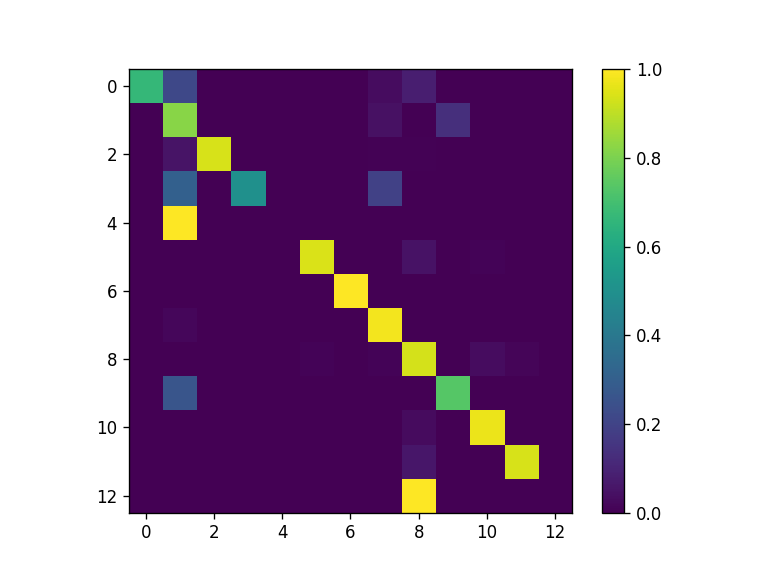

In [13]:
plt.figure()
plt.imshow(clf.best_estimator_.nlmnn.L)
plt.colorbar()

In [12]:
clf.best_params_

{'l': 0.01, 'mu': 0.01}